In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse
import scipy.sparse.linalg
import scipy.spatial
import scipy.stats
from GPy import models
import GPy

# Exercise 1

### 1:

In [2]:
def f(x,y):
    return x**2 - x + y**2 + y - np.cos(np.pi*(2*x - 1)) - np.cos(np.pi*(2*y + 1)) + 2.5

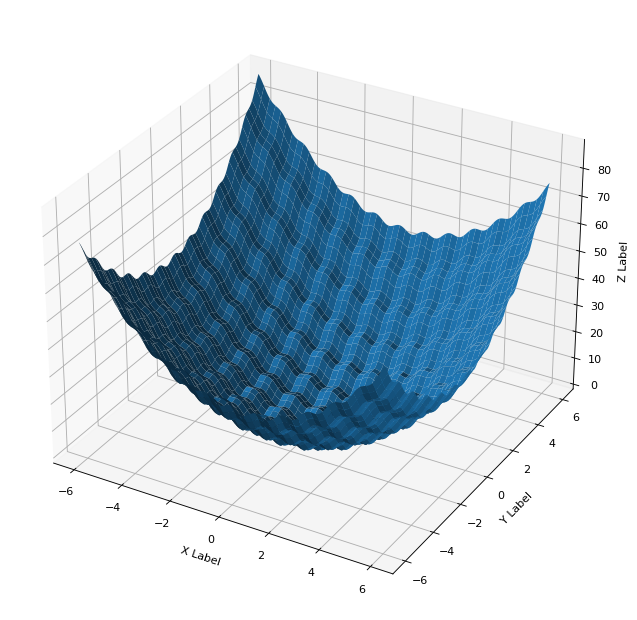

In [3]:
fig = plt.figure(figsize = (10,10), dpi = 80)
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-6.0, 6.0, 0.01)
X, Y = np.meshgrid(x, y)
zs = np.array(f(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

surf = ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [4]:
points = np.random.uniform(low = -6, high = 6, size = (2,60))
zs = np.array(f(points[0], points[1]))
scipy.stats.describe(zs)

DescribeResult(nobs=60, minmax=(1.4992161471563268, 73.96153337030525), mean=28.397500135848, variance=275.07785428000545, skewness=0.3329626928958855, kurtosis=-0.44249848421087945)

We see that the variance of the data points is quite high. For the quantities skewness and kurtosis we do not know a sensible interpretation since these are usually measures for pobability density functions, which f(x,y) is not.

### 2:

In [6]:
def Expected_Improvement(x, y):
    estMean, estVar = gpmodel.predict(np.array([[x,y]]))
    gamma = (E_best - estMean)/np.sqrt(estVar)
    cdf_gamma = scipy.stats.norm.cdf(gamma)
    pdf_gamma = scipy.stats.norm.pdf(gamma)
    return np.sqrt(estVar)*(gamma*cdf_gamma + pdf_gamma)

### 3:

In [8]:
import sobol
number_of_samples = 30
parameterUpperLimits = np.array([6,6])
parameterLowerLimits = np.array([-6,-6])

values = np.zeros(number_of_samples)
points = np.zeros((number_of_samples, 2))

for i in range(number_of_samples):
    x,y = sobol.i4_sobol(2,i)[0] * (parameterUpperLimits - parameterLowerLimits) + parameterLowerLimits
    values[i] = f(x,y)
    points[i] = np.array([x,y])

values = values[:,None]

### 5, 6, 7, 8:

In [9]:
import optunity

iterations = 30

E_best = values.min()

gp_refPoint = []

for i in range(iterations):
    gpmodel = models.GPRegression(points, values, GPy.kern.RBF(2) + GPy.kern.White(2))
    pars, details, _  = optunity.maximize(Expected_Improvement, x = [-6,6], y = [-6,6])

    q = np.array([pars['x'], pars['y']])
    value = f(q[0], q[1])
    
    points = np.append(points, [q], axis = 0)
    values = np.append(values, [[value]], axis = 0)

    gp_refPoint.append(gpmodel.predict(np.array([q]))[0][0])

    E_best = value

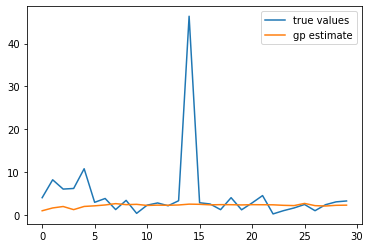

In [10]:
plt.plot(values[number_of_samples:], label = 'true values')
plt.plot(gp_refPoint, label = 'gp estimate')
plt.legend()
plt.show()

### 9:

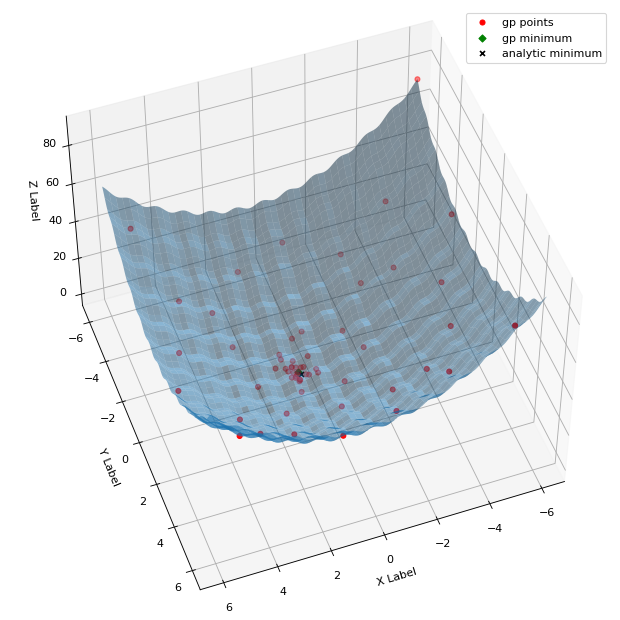

In [12]:
fig = plt.figure(figsize = (10,10), dpi = 80)
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-6.0, 6.0, 0.01)
X, Y = np.meshgrid(x, y)
zs = np.array(f(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

surf = ax.plot_surface(X, Y, Z, alpha = 0.5)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

i = np.argmin(values)

ax.scatter3D(points[:,0], points[:, 1], values[:], color = 'r', label = 'gp points')
ax.scatter3D(points[i,0], points[i, 1], values[i], color = 'g', label = 'gp minimum', marker = 'D')
ax.scatter3D(0.5,-.5,0, color = 'k', marker = 'x', label = 'analytic minimum')

ax.view_init(50,70)

plt.legend()
plt.show()

### 11:

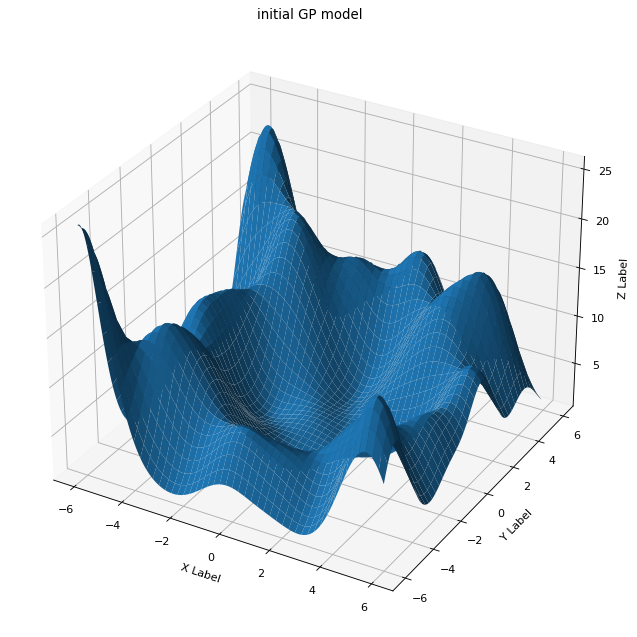

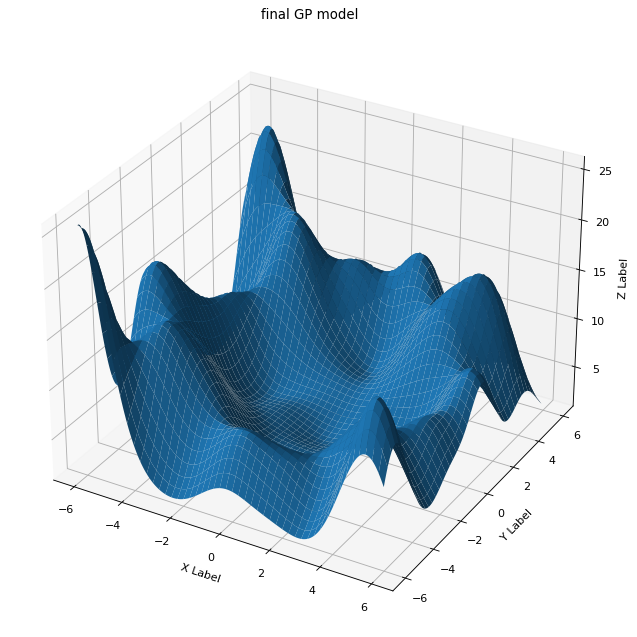

In [13]:
gpmodelinit = models.GPRegression(points[:30], values[:30], GPy.kern.RBF(2) + GPy.kern.White(2))
gpmodelfinal = models.GPRegression(points, values, GPy.kern.RBF(2) + GPy.kern.White(2))

fig = plt.figure(figsize = (10,10), dpi = 80)
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-6.0, 6.0, 0.05)
X, Y = np.meshgrid(x, y)
xflat = X.flatten()
yflat = Y.flatten()
p = np.array([xflat, yflat])
zs = np.array(gpmodelinit.predict(p.T)[0])
Z = zs.reshape(X.shape)

surf = ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_title('initial GP model')

plt.show()

fig = plt.figure(figsize = (10,10), dpi = 80)
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-6.0, 6.0, 0.05)
X, Y = np.meshgrid(x, y)
xflat = X.flatten()
yflat = Y.flatten()
p = np.array([xflat, yflat])
zs = np.array(gpmodelfinal.predict(p.T)[0])
Z = zs.reshape(X.shape)

surf = ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_title('final GP model')

plt.show()

### 10:

In [20]:
def maxVarGP(x, y):
    return gpmodel.predict(np.array([[x,y]]))[1]

In [21]:
number_of_samples = 30
parameterUpperLimits = np.array([6,6])
parameterLowerLimits = np.array([-6,-6])

values = np.zeros(number_of_samples)
points = np.zeros((number_of_samples, 2))

for i in range(number_of_samples):
    x,y = sobol.i4_sobol(2,i)[0] * (parameterUpperLimits - parameterLowerLimits) + parameterLowerLimits
    values[i] = f(x,y)
    points[i] = np.array([x,y])

values = values[:,None]

In [22]:
iterations = 30

E_best = values.min()

refPoint = np.array([[.5,-.5]])
gp_refPoint = []

for i in range(iterations):
    gpmodel = models.GPRegression(points, values, GPy.kern.RBF(2) + GPy.kern.White(2))

    if i%2 == 0:
        pars, details, _  = optunity.maximize(Expected_Improvement, x = [-6,6], y = [-6,6])
    else:
        pars, details, _ = optunity.maximize(maxVarGP, x = [-6,6], y = [-6,6])

    q = np.array([pars['x'], pars['y']])
    value = f(q[0], q[1])
    
    points = np.append(points, [q], axis = 0)
    values = np.append(values, [[value]], axis = 0)

    gp_refPoint.append(gpmodel.predict(np.array([q]))[0][0])

    E_best = value

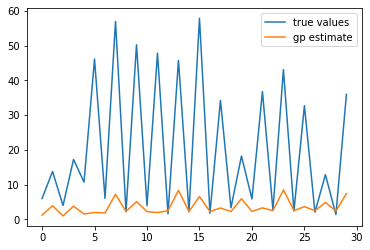

In [23]:
plt.plot(values[number_of_samples:], label = 'true values')
plt.plot(gp_refPoint, label = 'gp estimate')
plt.legend()
plt.show()

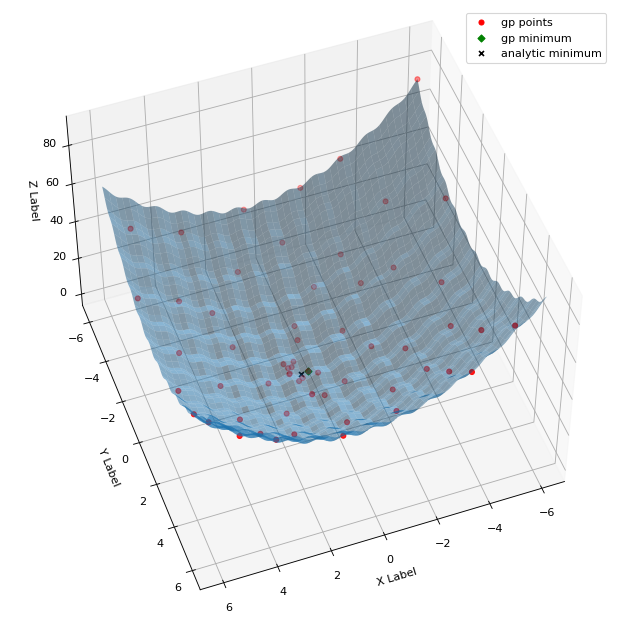

In [30]:
fig = plt.figure(figsize = (10,10), dpi = 80)
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-6.0, 6.0, 0.01)
X, Y = np.meshgrid(x, y)
zs = np.array(f(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

surf = ax.plot_surface(X, Y, Z, alpha = 0.5)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

i = np.argmin(values)

ax.scatter3D(points[:,0], points[:, 1], values[:], color = 'r', label = 'gp points')
ax.scatter3D(points[i,0], points[i, 1], values[i], color = 'g', label = 'gp minimum', marker = "D")
ax.scatter3D(0.5,-.5,0, color = 'k', marker = 'x', label = 'analytic minimum')

ax.view_init(50,70)

plt.legend()
plt.show()

### 11:

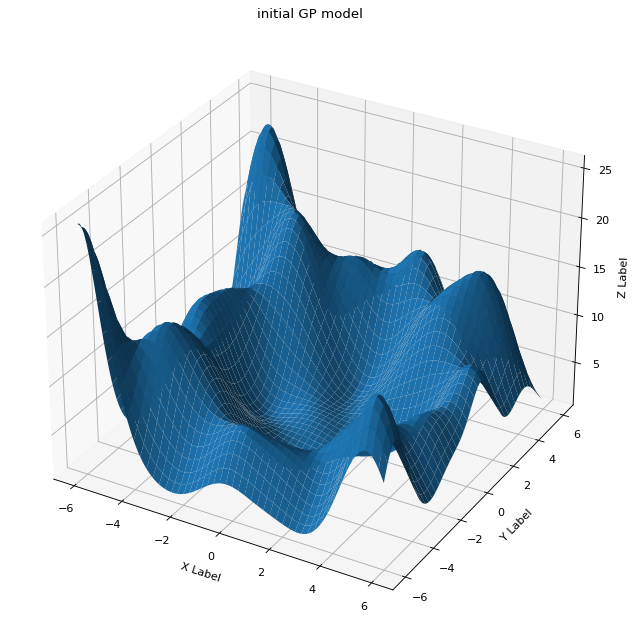

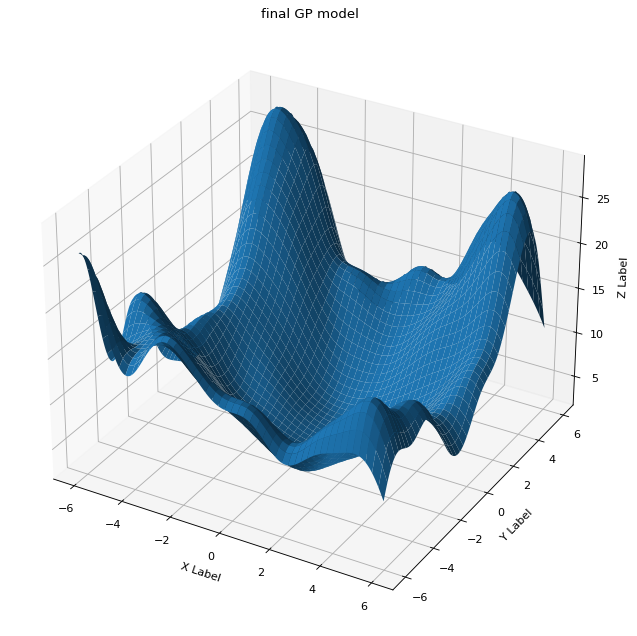

In [25]:
gpmodelinit = models.GPRegression(points[:30], values[:30], GPy.kern.RBF(2) + GPy.kern.White(2))
gpmodelfinal = models.GPRegression(points, values, GPy.kern.RBF(2) + GPy.kern.White(2))

fig = plt.figure(figsize = (10,10), dpi = 80)
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-6.0, 6.0, 0.05)
X, Y = np.meshgrid(x, y)
xflat = X.flatten()
yflat = Y.flatten()
p = np.array([xflat, yflat])
zs = np.array(gpmodelinit.predict(p.T)[0])
Z = zs.reshape(X.shape)

surf = ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_title('initial GP model')

plt.show()

fig = plt.figure(figsize = (10,10), dpi = 80)
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-6.0, 6.0, 0.05)
X, Y = np.meshgrid(x, y)
xflat = X.flatten()
yflat = Y.flatten()
p = np.array([xflat, yflat])
zs = np.array(gpmodelfinal.predict(p.T)[0])
Z = zs.reshape(X.shape)

surf = ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_title('final GP model')

plt.show()

### 12:

The function should be computable at every point (x,y).

# Exercise 2

In [14]:
opt_print = lambda *args, **kwargs: None  # silence output


# opt_print = print # for debugging

def gaussian_kernel(data, sigma, max_distance):
    """Compute the gaussian kernel matrix.

    :param data: data matrix
    :param sigma: parameter sigma of the gaussian kernel
    :return: gaussian kernel matrix
    """
    assert len(data.shape) == 2
    assert sigma > 0

    factor = -0.5 / (sigma ** 2)
    limit = np.exp(factor * max_distance ** 2)
    # Find the pairwise squared distances and compute the Gaussian kernel.
    K = []
    for k in data:
        d = np.exp(factor * np.sum((data - k) ** 2, axis=1))
        d[d < limit] = 0.0  # truncate the Gaussian
        d = scipy.sparse.csc_matrix(d[:, None])
        K.append(d)
    K = scipy.sparse.hstack(K)
    return K

################################################ own code ##################################################################################
def generalized_exponential_kernel(data, sigma, gamma, max_distance):
    """Compute the gaussian kernel matrix.

    :param data: data matrix
    :param sigma: parameter sigma of the generalized exponential kernel
    :param gamma: parameter gamma of the generalized exponential kernel
    :return: generalized exponential kernel matrix
    """
    assert len(data.shape) == 2
    assert sigma > 0

    factor = -1/sigma**gamma
    limit = np.exp(factor * max_distance ** gamma)
    # Find the pairwise squared distances and compute the Gaussian kernel.
    K = []
    for k in data:
        d = np.exp(factor * np.sqrt(np.sum((data - k) ** 2, axis=1))**gamma)
        d[d < limit] = 0.0  # truncate the Gaussian
        d = scipy.sparse.csc_matrix(d[:, None])
        K.append(d)
    K = scipy.sparse.hstack(K)
    return K
#################################################################################################################################################

def compute_alpha(train_x, train_y, tau, sigma, gamma, max_distance, verbose=False):
    """Compute the alpha vector of the ridge regressor.

    :param train_x: training x data
    :param train_y: training y data
    :param tau: parameter tau of the ridge regressor
    :param sigma: parameter sigma of the gaussian kernel
    :param verbose: Print debugging information?
    :return: alpha vector
    """
    if verbose: print("Building input kernel matrix")
    ####### Modified:
    K = generalized_exponential_kernel(train_x, sigma, gamma, max_distance)
    if verbose: print("Sparsity is: %.2f%%" % (
            float(100 * K.nnz) / (K.shape[0] * K.shape[1])))
    M = K + tau * scipy.sparse.identity(train_x.shape[0])
    y = scipy.sparse.csc_matrix(train_y[:, None])
    if verbose: print("Solving sparse system")
    alpha = scipy.sparse.linalg.cg(M, train_y)
    if verbose: print("Done computing alpha")
    return alpha[0]


class KernelRidgeRegressor(object):
    """Kernel Ridge Regressor.
    """

    def __init__(self, tau, sigma, gamma):
        self.dim = None
        self.train_x = None
        self.alpha = None
        self.mean_y = None
        self.std_y = None
        self.tau = tau
        self.sigma = sigma
        self.gamma = gamma
        self.scale = -0.5 / sigma**2
        self.max_distance = 4.0*sigma

    def train(self, train_x, train_y, verbose=False):
        """Train the kernel ridge regressor.

        :param train_x: training x data
        :param train_y: training y data
        """
        assert len(train_x.shape) == 2
        assert len(train_y.shape) == 1
        assert train_x.shape[0] == train_y.shape[0]

        self.dim = train_x.shape[1]
        self.train_x = train_x.astype(np.float32)
        self.tree = scipy.spatial.cKDTree(self.train_x)

        self.mean_y = train_y.mean()
        self.std_y = train_y.std()
        train_y_std = (train_y - self.mean_y) / self.std_y

        self.alpha = compute_alpha(self.train_x, train_y_std, self.tau,
                                   self.sigma, self.gamma, self.max_distance,
                                   verbose=verbose)


    def predict_single(self, pred_x):
        """Predict the value of a single instance.

        :param pred_x: x data
        :return: predicted value of pred_x
        """
        assert len(pred_x.shape) == 1
        assert pred_x.shape[0] == self.dim
        indices = np.asarray(
            self.tree.query_ball_point(pred_x, self.max_distance),
            dtype=np.dtype("i8"))
        dist = np.sum((self.train_x[indices] - pred_x) ** 2, axis=1)
        kappa = np.exp(self.scale * dist)
        pred_y = np.dot(kappa, self.alpha[indices])
        return self.std_y * pred_y + self.mean_y

    def predict(self, pred_x):
        """Predict the values of pred_x.

        :param pred_x: x data
        :return: predicted values of pred_x
        """
        assert len(pred_x.shape) == 2
        assert pred_x.shape[1] == self.dim
        pred_x = pred_x.astype(np.float32)
        return np.array([self.predict_single(x) for x in pred_x])


def kernel_ridge_regression(tau, sigma, gamma, verbose=False):
    # Load the image.
    im_orig = np.squeeze(plt.imread("cc_90.png"))

    # Make a copy, so both the original and the regressed image can be shown afterwards.
    im = np.array(im_orig)

    # Find the known pixels and the pixels that shall be predicted.
    known_ind = np.where(im != 0)
    # predict everywhere, use im == 0 to predict only unfilled values
    unknown_ind = np.where(im >= 0)
    known_x = np.array(known_ind).transpose()
    known_y = np.array(im[known_ind])
    pred_x = np.array(unknown_ind).transpose()

    # Train and predict with the given regressor.
    start = time.time()
    if verbose: print("Training...")
    r = KernelRidgeRegressor(tau, sigma, gamma)
    r.train(known_x, known_y, verbose=verbose)
    if verbose: print("Done training.")

    if verbose: print("Predicting... ", end="")
    pred_y = r.predict(pred_x)
    if verbose: print("Done.")

    # Write the predicted values back into the image and show the result.
    im[unknown_ind] = pred_y
    stop = time.time()
    if verbose: print("Train and predict took %.02f seconds." % (stop - start))
    if verbose: print(im.shape)

    return im


Answers:
- instead of calculating the inverse directly, the linear system $M \alpha = y_{train}$ is solved approximately for $\alpha$ by an iterative solver, namely by the conjugate gradient one for sparse matrices provided by scipy.

- to store the matrix a sparse matrix format, namely the csc format, is used, this reduces the amount of storage used for sparse matrices. To find the relevant points for the prediction a cKD-tree is used to find nearest neighbors quickly.

In [15]:
im = kernel_ridge_regression(.8, 3., 1., verbose=True)

FileNotFoundError: [Errno 2] No such file or directory: 'cc_90.png'

In [16]:
im_missing = np.squeeze(plt.imread("cc_90.png"))
im_orig = np.squeeze(plt.imread("charlie-chaplin.jpg"))
plt.imshow(im_missing, cmap = 'gray')
plt.show()
plt.imshow(im, cmap = 'gray')
plt.show()
plt.imshow(im_orig, cmap = 'gray')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'cc_90.png'

# Exercise 3

In [22]:
def corr(recon):
    ground = im_orig = np.squeeze(plt.imread("charlie-chaplin.jpg"))

    meanRecon = np.mean(recon)
    meanGround = np.mean(ground)

    reconShifted = recon - meanRecon
    groundShifted = ground - meanGround

    numerator = np.sum((reconShifted)*(groundShifted))
    denominator = np.sqrt(np.sum(reconShifted**2))*np.sqrt(np.sum(groundShifted**2))

    return numerator/denominator

In [23]:
print(corr(im))

0.9233941960116878


We see that the correlation is quite high, this means the reconstuction from the task before is already quite good.

In [24]:
number_of_samples = 20
parameterUpperLimits = np.array([1,7,4])
parameterLowerLimits = np.array([0.005,1,1])

values = np.zeros(number_of_samples)
points = np.zeros((number_of_samples, 3))

for i in range(number_of_samples):
    tau, sigma, gamma = sobol.i4_sobol(3,i)[0] * (parameterUpperLimits - parameterLowerLimits) + parameterLowerLimits
    values[i] = corr(kernel_ridge_regression(tau, sigma, gamma))
    points[i] = np.array([tau, sigma, gamma])

values = values[:,None]

In [25]:
def GPPredict(tau, sigma, gamma):
    return gpmodel.predict(np.array([[tau, sigma, gamma]]))

In [26]:
iterations = 40
gp_prediction = []

for i in range(iterations):
    gpmodel = models.GPRegression(points, values,GPy.kern.Matern52(3, ARD = True, lengthscale = [1, 4, 1]))
    pars, details, _  = optunity.maximize(GPPredict, tau = [0.005,1], sigma = [1,7], gamma = [1,4])

    q = np.array([pars['tau'], pars['sigma'], pars['gamma']])
    value = corr(kernel_ridge_regression(q[0], q[1], q[2]))

    gp_prediction.append(GPPredict(q[0], q[1], q[2])[0])
    
    points = np.append(points, [q], axis = 0)
    values = np.append(values, [[value]], axis = 0)


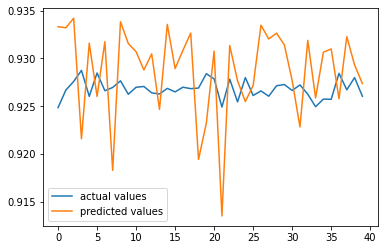

In [28]:
plt.plot(values[number_of_samples:], label = 'actual values')
plt.plot(np.array(gp_prediction)[:,0,0], label = 'predicted values')
plt.legend()
plt.show()

corr: 0.9294725765231538
tau: 0.4403125, sigma: 4.375, gamma: 1.1875


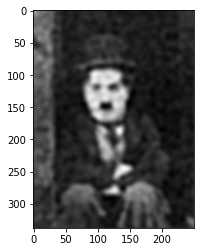

In [30]:
i = np.argmax(values)
tau, sigma, gamma = points[i]
gpgpim = kernel_ridge_regression(tau, sigma, gamma)
print(f"corr: {values[i][0]}")
print(f"tau: {tau}, sigma: {sigma}, gamma: {gamma}")
plt.imshow(gpgpim, cmap = 'gray')

Except for gamma the values are different to the parameters given in the exercise. The correlation only improved a bit (~ +0.006).